In [1]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
import pandas as pd
import numpy  as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the data
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

7


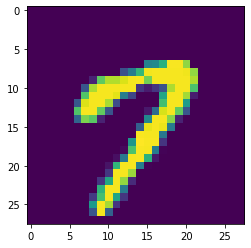

In [4]:
plt.imshow(X_train[15]);
print(Y_train[15])

In [5]:
#reshaping the data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [6]:
#Normalizing the data
X_train= X_train/255
X_test= X_test/255

In [7]:
print(X_train)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

## Model Building

In [8]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [9]:
#fitting the model
model.fit(X_train,Y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1580 - accuracy: 0.9539
Epoch 2/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0519 - accuracy: 0.9844
Epoch 3/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0329 - accuracy: 0.9896
Epoch 4/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0226 - accuracy: 0.9928
Epoch 5/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0148 - accuracy: 0.9954
Epoch 6/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0115 - accuracy: 0.9959
Epoch 7/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0073 - accuracy: 0.9976
Epoch 8/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0050 - accuracy: 0.9985
Epoch 9/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0052 - accuracy: 0.9983
Epoch 10/15
1875/1875 [==============================] - 21s 11m

In [10]:
#evaluting the model
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0694 - accuracy: 0.9872


[0.06941477954387665, 0.9872000217437744]

In [11]:
#predicting
Y_pred = model.predict(X_test)    

In [12]:
print(Y_pred[6])

[3.0337769e-25 1.8751408e-13 7.6722292e-18 1.5643900e-19 9.9999964e-01
 8.2366953e-17 8.7430456e-22 6.3581125e-14 2.2313024e-07 1.1304089e-07]


In [13]:
np.argmax(Y_pred[6])

4

In [14]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 5, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 7, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [15]:
Y_pred.shape

(10000, 10)

In [16]:
#Plotting a confusion Matrix
from tensorflow.math import confusion_matrix
CF = confusion_matrix(Y_test,Y_pred_labels)

In [17]:
print(CF)

tf.Tensor(
[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1132    1    0    0    0    1    1    0    0]
 [   2    3 1014    2    0    0    1    6    4    0]
 [   1    0    1  994    0    7    0    6    1    0]
 [   0    0    0    0  972    0    3    0    1    6]
 [   1    0    1    2    0  887    1    0    0    0]
 [   7    3    2    1    1    4  939    0    1    0]
 [   1    1    8    0    0    0    0 1014    1    3]
 [   5    1    2    1    0    4    1    2  953    5]
 [   4    1    0    2    5    1    0    5    3  988]], shape=(10, 10), dtype=int32)


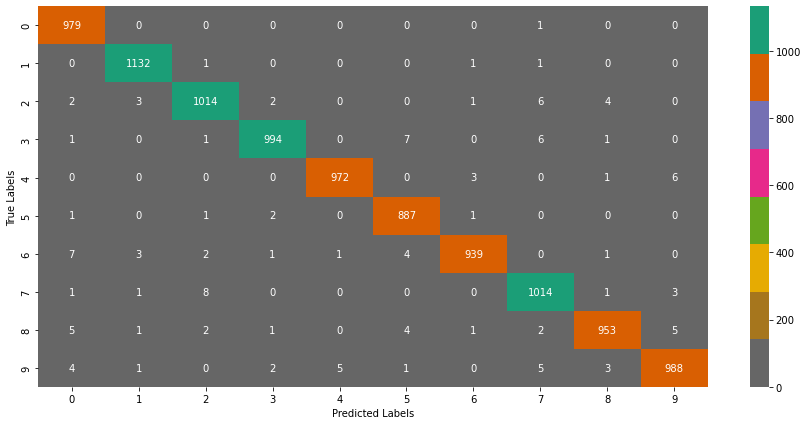

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(CF, annot=True, fmt='d', cmap='Dark2_r')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels');

## Predicting using a sample image

In [28]:
import cv2
input_image_path = "MNIST_6_0.png"
input_image = cv2.imread(input_image_path)

In [29]:
type(input_image)

numpy.ndarray

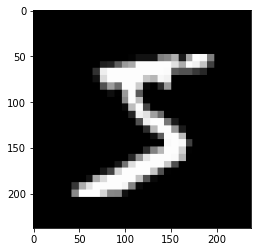

In [39]:
plt.imshow(input_image);

In [40]:
input_image.shape

(238, 238, 3)

In [41]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [42]:
grayscale.shape

(238, 238)

In [44]:
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [45]:
image_reshaped.shape

(1, 28, 28)

In [46]:
model_pred = model.predict(image_reshaped)
np.argmax(model_pred)

5

Path of the image to be predicted: MNIST_6_0.png
The Handwritten Digit is recognised as  5


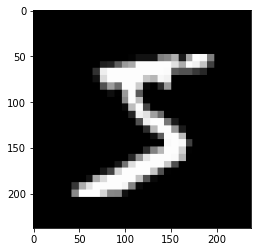

In [48]:
#predictive system
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

---